                                   sum_sq    df           F        PR(>F)
C(gender)                        1.998919   1.0    0.225022  6.373911e-01
C(education_level)            5655.438003   2.0  318.320891  1.989153e-28
C(gender):C(education_level)    75.092685   2.0    4.226652  2.038191e-02
Residual                       426.395238  48.0         NaN           NaN
Shapiro-Wilk Test for Normality: W=0.963517963886261, p=0.09908279031515121
Levene's Test for Homogeneity of Variances: W=0.17113485814273213, p=0.8431898346629887


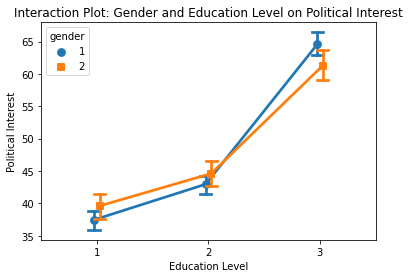

In [16]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene

#Null hypothesis: There is no significant interaction effect on political interest between gender and education level.
#Independence: Each observation must be independent.
#Normality: The residuals within each group must be normally distributed.
#Homogeneity of Variances: Variances within groups must be approximately equal.

data = {
    "gender": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    "education_level": [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
    "political_interest": [38, 39, 35, 38, 41, 40, 36, 37, 33, 41.5, 41.5, 44.5, 44.5, 44, 46.5, 42, 43.5, 38.5, 63, 64, 61, 64, 69, 69, 66, 62, 63, 40, 41, 36, 39, 44, 44, 42, 38, 38, 34, 45, 46, 41, 44, 49, 49, 47, 43, 43, 39, 57, 58, 63, 66, 65, 61, 59]
}
df['gender'] = df['gender'].astype('category')
df['education_level'] = df['education_level'].astype('category')

model = ols('political_interest ~ C(gender) + C(education_level) + C(gender):C(education_level)', data=df).fit()
anova_results = anova_lm(model, typ=2)

print(anova_results)

# 1. Shapiro-Wilk Test for Normality of Residuals
shapiro_test = shapiro(model.resid)
print(f"Shapiro-Wilk Test for Normality: W={shapiro_test.statistic}, p={shapiro_test.pvalue}")

# 2. Levene's Test for Homogeneity of Variances
levene_test = levene(
    df[df['education_level'] == 1]['political_interest'],
    df[df['education_level'] == 2]['political_interest'],
    df[df['education_level'] == 3]['political_interest']
)
print(f"Levene's Test for Homogeneity of Variances: W={levene_test.statistic}, p={levene_test.pvalue}")
#Plot
sns.pointplot(data=df, x="education_level", y="political_interest", hue="gender", dodge=True, markers=["o", "s"], capsize=0.1)
plt.title("Interaction Plot: Gender and Education Level on Political Interest")
plt.ylabel("Political Interest")
plt.xlabel("Education Level")
plt.show()

#### P test values:

Gender = 0.6373 (No Significant main effect)

Education Level = 1.989 x 10^-28 (Highly significant main effect)

G*E = 0.0203 (Significant/This indicates that the effect of education level on political interest depends on gender.)


#### Assumptions
Shapiro-Wilk Test for Normality: W=0.964, p=0.099: Fail to reject H0, indicating the residuals are normally distributed.


Levene's Test for Homogeneity of Variances:W = 0.171, p = 0.843: Fail to reject H0, indicating homogeneity of variances across groups.








In [11]:
descriptive_stats = df.groupby(['gender', 'education_level'])['political_interest'].agg(['mean', 'median', 'std', 'count'])
descriptive_stats = descriptive_stats.round(3)
print(descriptive_stats)


                          mean  median    std  count
gender education_level                              
1      1                37.444    38.0  2.506      9
       2                42.944    43.5  2.338      9
       3                64.556    64.0  2.877      9
2      1                39.600    39.5  3.273     10
       2                44.600    44.5  3.273     10
       3                61.286    61.0  3.498      7
